Tutorial from

https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn#step-2

#### Import the relevant libraries

In [4]:
#efficient numerical computation
import numpy as np
#easy dataframe handling
import pandas as pd

#preprocessing: scaling, transforming and wrangling
from sklearn import preprocessing

#sampling helper and model performance evaluator
from sklearn.model_selection import train_test_split, GridSearchCV

#families of models we will use:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#cross-validation help
from sklearn.pipeline import Pipeline, make_pipeline

#metrics for evaluating model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#To save our model for future use
from sklearn.externals import joblib #like pickle but more efficient for larger np arrays

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# The Data

http://archive.ics.uci.edu/ml/datasets/Wine

to see how we can maximise red wine quality

In [5]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Our task is to predict wine quality using the following attributes: 
'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates' and 'alcohol'

# Exploratory Data analysis

In [6]:
y = data.quality     #targets column
X = data.drop('quality', axis=1)  #features 

print('\nOur data has %d observations and %d features' %(X.shape[0], X.shape[1]))
display(data.head())

print('\nThere are', y.nunique(), 'Unique values for quality, namely:', sorted(y.unique())) 



Our data has 1599 observations and 11 features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



There are 6 Unique values for quality, namely: [3, 4, 5, 6, 7, 8]


### Let's visualise our data

Let's say wines with quality $>= 7$ are good quality, 

$5 \leq$ quality $< 6 \implies$ average quality 

and quality $< 5$ is bad quality 

In [7]:
vgq = data[y>6]  #top tier quality
aq = data[(y>=5) & (y<=6)]  #average quality
bq = data[y<5]   #bad quality

print('%.2f %% of the wines are of top tier quality' %(100*len(vgq)/len(y)))
print('%.2f %% of the wines are of average quality' %(100*len(aq)/len(y)))
print('%.2f %% of the wines are below average quality' %(100*len(bq)/len(y)))

13.57 % of the wines are of top tier quality
82.49 % of the wines are of average quality
3.94 % of the wines are below average quality


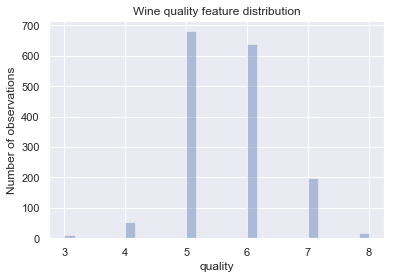

In [8]:
sns.distplot(y, norm_hist=False, kde=False)
plt.title('Wine quality feature distribution')
plt.ylabel('Number of observations')
plt.show()

Most wines are of average quality, less than half are above average while even fewer are below average

Let's separate the wines of quality $\geq 7$ from the rest of the wines. 
We will be building classifiers for the very good wine quality only.

## Correlations between the features

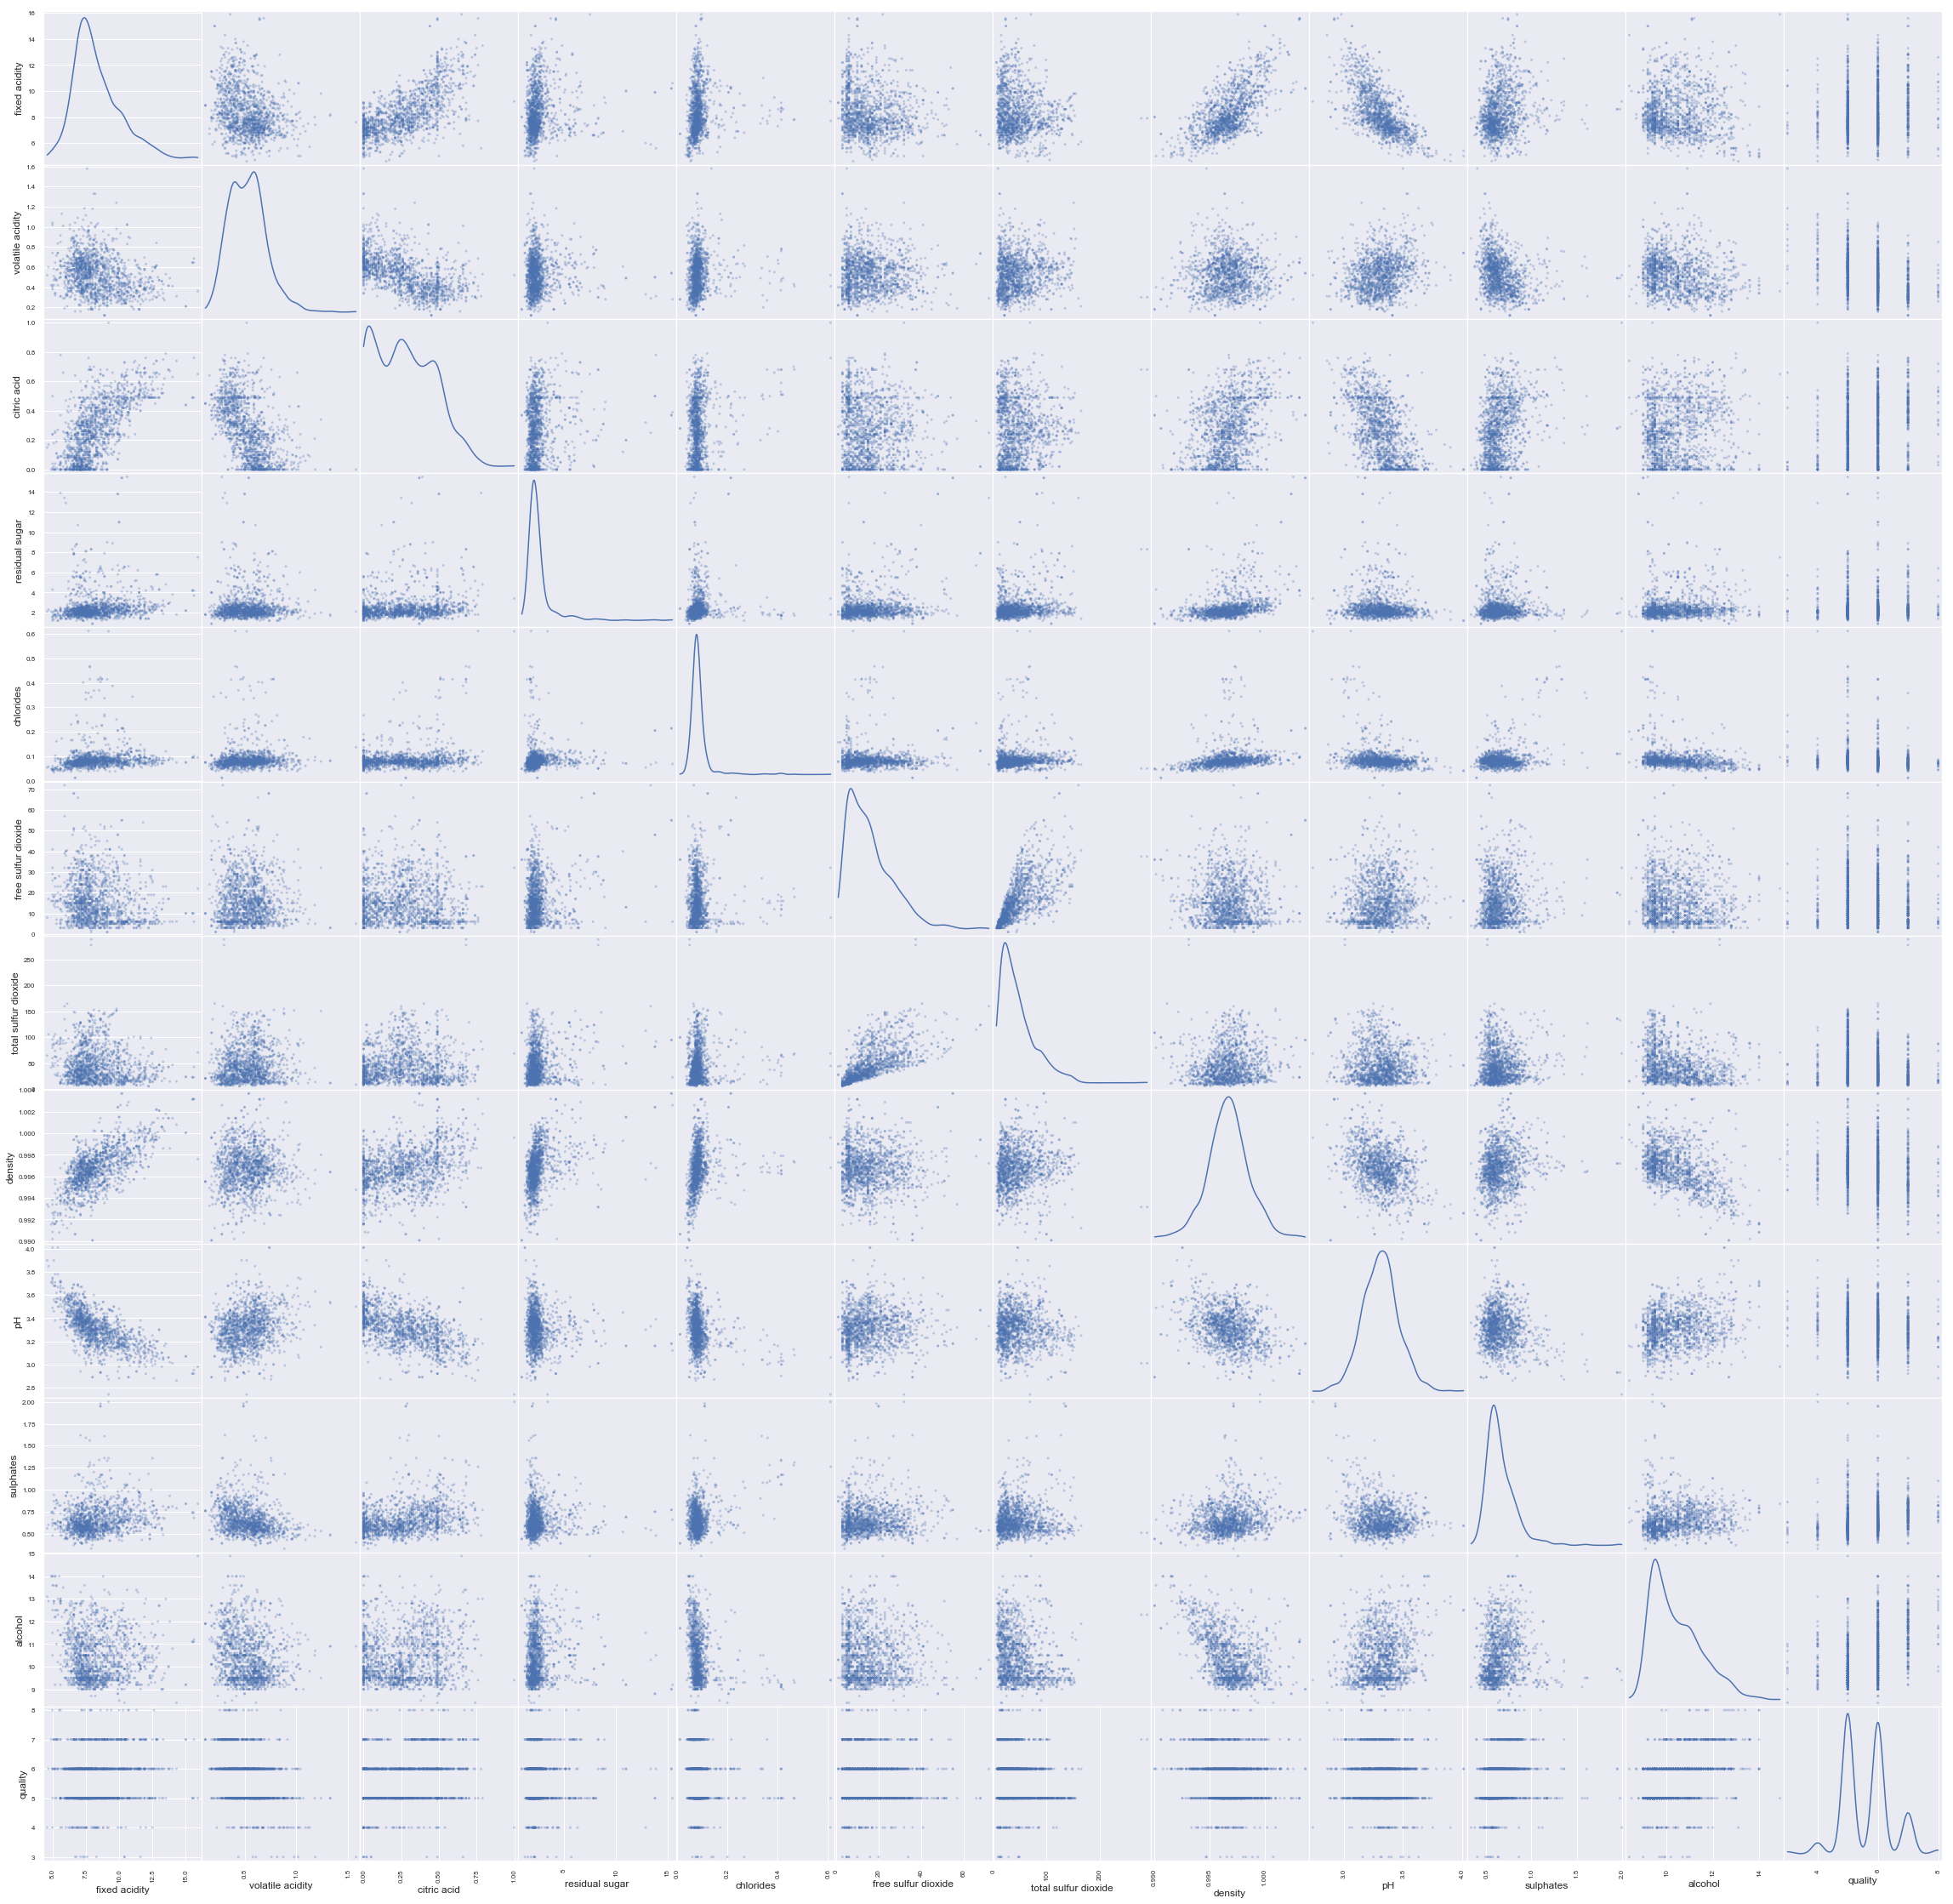

In [9]:
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde');



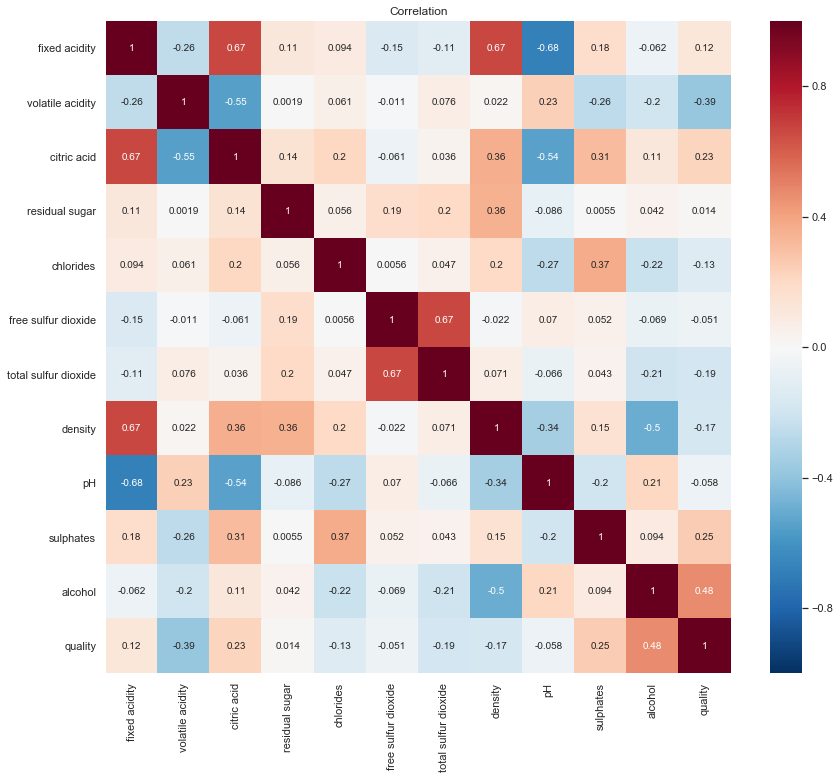

In [10]:
correlation = data.corr()
plt.figure(figsize=(14,12))
plt.title('Correlation')
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
#plt.show()

Red squares: positive correlation, increase in one $\implies$ increase in the other

Blue squares: negative correlation, increase in one $\implies$ decrease in the other

# Preprocessing
## Split data into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=0,
                                                   stratify=y)
# 5: Declare data processing steps

#columns with missing data
print(data.isnull().any())
#cols_with_missing = [col for col in X.columns if X[col].isnull().any()]
#No missing data

#Categorical values?
cat = [cname for cname in X.columns if X[cname].dtype == 'object']
print('categorical columns\n', cat)
#no categorical variables

#numerical data?
num = [cname for cname in X.columns if X[cname].dtype in ['int64','float64']]
print(num == X.columns)
#All columns contain numerical data

#preprocessing will entail standardizing

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool
categorical columns
 []
[ True  True  True  True  True  True  True  True  True  True  True]


* All the features are numeric (convenient!)

* They have different scales (We should standardize them later)

# Models

### Create RandomForestRegressor pipeline

In [10]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessing.StandardScaler()),
                              ('model', RandomForestClassifier(n_estimators=100, random_state=0))])
#Optimise hyperparameters
my_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('model',
   RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
               max_depth=None, max_features='auto', max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
               oob_score=False, random_state=0, verbose=0, warm_start=False))],
 'preprocessor': StandardScaler(copy=True, with_mean=True, with_std=True),
 'model': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
             oob_score=Fa

In [11]:
#check documentation for possible alternatives to hyperparameters
hyperparameters = {'model__max_features' : ['auto', 'sqrt', 'log2'],
                  'model__max_depth': [None, 5, 3, 1]}
#                   ,'criterion':['mae', 'mse'] }

clf = GridSearchCV(my_pipeline,hyperparameters, cv=10)

clf.fit(X_train, y_train)

/Users/clemence/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=Non...mators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'model__max_features': ['auto', 'sqrt', 'log2'], 'model__max_depth': [None, 5, 3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
clf.best_params_
#The default parameters are best in this case. No need for retuning

{'model__max_depth': None, 'model__max_features': 'auto'}

In [13]:
confidence = clf.score(X_test, y_test)
print(' prediction efficiency:\n', confidence)

 prediction efficiency:
 0.71875


In [ ]:
#make predictions
predictions = clf.predict(X_test)
#evaluate error in predictions
mae = mean_absolute_error(y_test, predictions)
print('MAE:', mae)

mse = mean_squared_error(y_test, predictions)
print('MSE:', mse)


MAE: 0.328125
MSE: 0.428125


### Let's try XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgrad = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=-1)
xgrad.fit(X_train, y_train, 
          early_stopping_rounds=5, 
          eval_set=[(X_test, y_test)], 
          verbose=False)

In [ ]:
xpred = xgrad.predict(X_test)


### Feature Importances

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(xgrad, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

### Evaluating Classifier Performance

### Let's try tpot

ref: https://github.com/srivatsan88/TPOT/blob/master/TPOT.ipynb

In [1]:
from tpot import  TPOTClassifier

In [2]:
tpot =  TPOTClassifier(generations=5, population_size=20, verbosity=2, n_jobs=-1, use_dask=True)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

NameError: name 'X_train' is not defined

# References:
https://www.freecodecamp.org/news/using-data-science-to-understand-what-makes-wine-taste-good-669b496c67ee/

